In [11]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

def fetchData(min_pic):
    return fetch_lfw_people(min_faces_per_person=min_pic)

In [12]:
errState = True;

while errState == True:
    try:
        faces = fetchData(19)
        print(faces.target_names)
        print(len(faces.target_names))
        print(faces.images.shape)
        errState = False
        print("Berhasil ler")
    except:
        print("Error ler")
        errState = True

['Alejandro Toledo' 'Amelie Mauresmo' 'Ariel Sharon'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hamid Karzai' 'Hans Blix' 'Igor Ivanov' 'John Howard'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Megawati Sukarnoputri' 'Tiger Woods' 'Tom Daschle' 'Tony Blair'
 'Vicente Fox']
23
(1761, 62, 47)
Berhasil ler


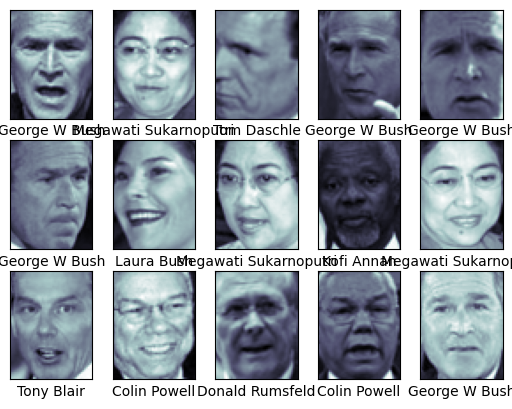

In [13]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [14]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    faces.data,
    faces.target,
    random_state=42)

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1.71 s, sys: 126 ms, total: 1.84 s
Wall time: 8.45 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.7446969696969696


In [17]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

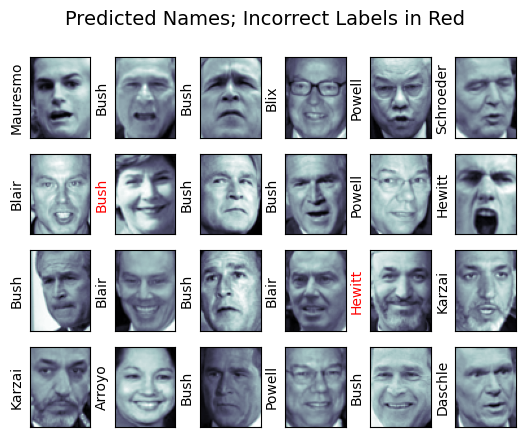

In [18]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [19]:
from sklearn.metrics import classification_report
print(
    classification_report(
        ytest,
        yfit,
        target_names=faces.target_names,
        zero_division=1
    )
)

                         precision    recall  f1-score   support

       Alejandro Toledo       0.62      0.67      0.64        12
        Amelie Mauresmo       0.75      0.30      0.43        10
           Ariel Sharon       0.59      0.85      0.69        20
   Atal Bihari Vajpayee       1.00      0.50      0.67         6
           Bill Clinton       0.22      0.40      0.29         5
           Colin Powell       0.81      0.76      0.79        63
        Donald Rumsfeld       0.62      0.62      0.62        29
          George W Bush       0.85      0.85      0.85       117
      Gerhard Schroeder       0.74      0.77      0.75        26
Gloria Macapagal Arroyo       0.88      0.88      0.88        17
           Hamid Karzai       1.00      0.30      0.46        10
              Hans Blix       0.53      0.89      0.67         9
            Igor Ivanov       0.00      0.00      0.00         3
            John Howard       0.20      0.25      0.22         4
      Junichiro Koizumi 

Text(113.92222222222219, 0.5, 'predicted label')

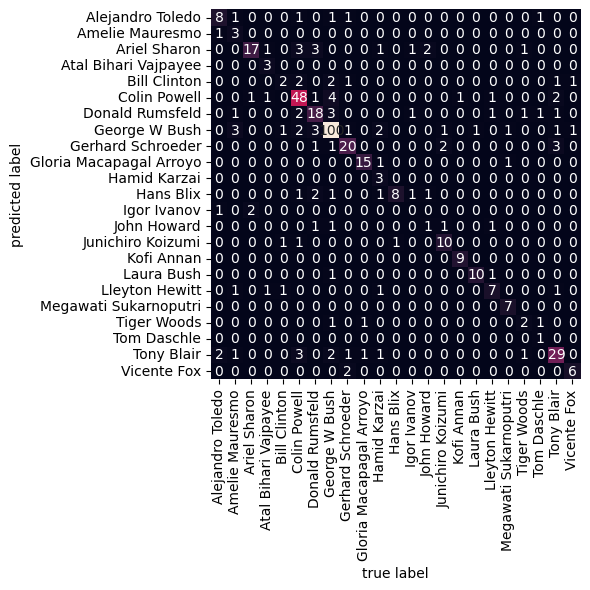

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')